In [1]:
import csv
import collections
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import sparse

In [2]:
path = 'data/large_sparse.npz'
sparse_matrix = sparse.load_npz(path)

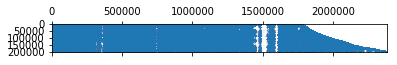

In [30]:
plt.spy(sparse_matrix, markersize = 0.004)

In [12]:
sparse_matrix = sparse_matrix[-200_000:]

In [5]:
sparse_matrix[505780,:] = 0

/usr/local/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [6]:
sparse_matrix[505779,:] = 0

In [13]:
(sparse_matrix > 100).nonzero()[0].shape


(3172,)

In [14]:
port_sum = sparse_matrix.sum(0)

In [15]:
port_sum_s = port_sum[:1_000_000]
port_sum

matrix([[0.      , 0.      , 0.      , ..., 0.019999, 1.329999, 0.      ]])

(array([2062607.,   66505.,   32230.,   20635.,   14835.,   11020.,
           8860.,    7519.,    6389.]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <a list of 9 Patch objects>)

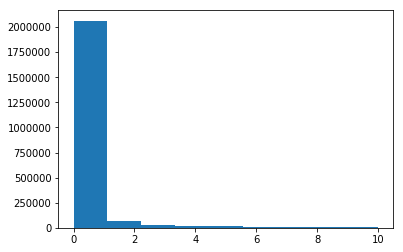

In [36]:
plt.hist(port_sum_s[np.abs(port_sum_s) < 10 ].T, bins = np.linspace(0,10,10))

In [27]:
x_max = port_sum.argmax(0)
x_min = port_sum.argmin(0)[0]
print(x_max)
print(x_min)
port_sum.argmin(0)

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


matrix([[0, 0, 0, ..., 0, 0, 0]])

In [28]:
x_data = sparse_matrix[505779].data
plt.plot(x_data)

IndexError: index (505779) out of range